In [1]:
%matplotlib inline

In [2]:
!ls data/retailhero-uplift.zip 2>&1 > /dev/null || \
 wget https://storage.yandexcloud.net/datasouls-competitions/x5-retailhero/retailhero-uplift.zip -O data/retailhero-uplift.zip

In [3]:
!ls data/products.csv 2>&1 > /dev/null || \
 unzip -o data/retailhero-uplift.zip

In [4]:
!ls data/

clients.csv                  uplift_sample_submission.csv
products.csv                 uplift_test.csv
purchases.csv                uplift_train.csv
retailhero-uplift.zip


In [5]:
import pandas as pd

In [6]:
df_clients = pd.read_csv('data/clients.csv', dtype={
    'client_id': 'category',
    'age': 'category',
    'gender': 'category'
}, parse_dates=['first_issue_date', 'first_redeem_date'])
df_clients.head(1)

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U


In [7]:
df_products = pd.read_csv('data/products.csv', dtype={
    'product_id': 'category',
    'level_1': 'category',
    'level_2': 'category',
    'level_3': 'category',
    'level_4': 'category',
    'segment_id': 'category',
    'brand_id': 'category',
    'vendor_id': 'category'
})
df_products.head(1)

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.4,0,0


In [8]:
df_purchases = pd.read_csv('data/purchases.csv', dtype={
    'client_id': 'category',
    'transaction_id': 'category',
    'store_id': 'category',
    'product_id': 'category'
}, parse_dates=['transaction_datetime'])
df_purchases.head(1)

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN


In [9]:
df_train = pd.read_csv('data/uplift_train.csv', dtype={
    'client_id': 'category'
})
df_train.head(1)

,client_id,treatment_flg,target
0,000012768d,0,1


In [10]:
df_test = pd.read_csv('data/uplift_test.csv')
df_test.head(1)

,client_id
0,000048b7a6


In [11]:
!head -n2 data/uplift_sample_submission.csv

client_id,uplift
008fb49e3a,0.1149912020897228


In [12]:
df_purchases['transaction_datetime'] = pd.to_datetime(df_purchases['transaction_datetime'])

In [13]:
df_products.describe()

,netto,is_own_trademark,is_alcohol
count,43035.000000,43038.000000,43038.000000
mean,0.536966,0.035178,0.055602
std,8.274367,0.184232,0.229154
min,0.000000,0.000000,0.000000
25%,0.150000,0.000000,0.000000
50%,0.300000,0.000000,0.000000
75%,0.500000,0.000000,0.000000
max,1150.000000,1.000000,1.000000


In [14]:
df_purchases.describe()

,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,product_quantity,trn_sum_from_iss,trn_sum_from_red
count,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,4.578657e+07,3.043356e+06
mean,8.049876e+00,6.084099e-02,-5.312626e+00,-3.181049e-01,7.775215e+02,1.247245e+00,7.348835e+01,7.677407e+01
std,1.268503e+01,2.426226e+00,3.603646e+01,3.287976e+00,7.965350e+02,3.137584e+00,8.753977e+01,8.427114e+01
min,0.000000e+00,0.000000e+00,-5.066000e+03,-3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.860000e+02,1.000000e+00,3.000000e+01,3.100000e+01
50%,3.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.390000e+02,1.000000e+00,5.100000e+01,5.500000e+01
75%,1.030000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.760000e+02,1.000000e+00,9.000000e+01,9.500000e+01
max,2.399000e+03,3.000000e+02,0.000000e+00,0.000000e+00,3.514904e+04,1.494100e+04,3.514900e+04,8.789000e+03


In [15]:
df_clients.describe()

,client_id,first_issue_date,first_redeem_date,age,gender
count,400162,400162,364693,400162,400162
unique,400162,396725,362527,290,3
top,fffff6ce77,2017-07-27 18:00:57,2018-12-22 15:44:47,33,U
freq,1,3,3,9437,185706
first,NaN,2017-04-04 18:24:18,2017-04-11 09:42:20,NaN,NaN
last,NaN,2019-03-15 21:50:56,2019-11-20 01:14:10,NaN,NaN


In [16]:
# Note to self: describes are much more helpful when pandas notes these are categorical
df_products[['level_1', 'level_2', 'level_3', 'level_4', 'segment_id', 'brand_id', 'vendor_id']].describe()

,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id
count,43035,43035,43035,43035,41466,37838,43004
unique,3,42,201,790,116,4296,3193
top,e344ab2e71,52f13dac0c,ca69ed9de2,420c3b3f0b,105.0,0d6f137fb6,43acd80c1a
freq,22183,8891,3737,2500,5360,4344,1514


In [24]:
df_purchases['date'] = df_purchases['transaction_datetime'].dt.date

In [74]:
transactions_by_date = df_purchases[['transaction_id', 'date']].groupby('date', as_index=False).agg({'transaction_id': 'count'})
transactions_by_date.columns = ['date', 'count']

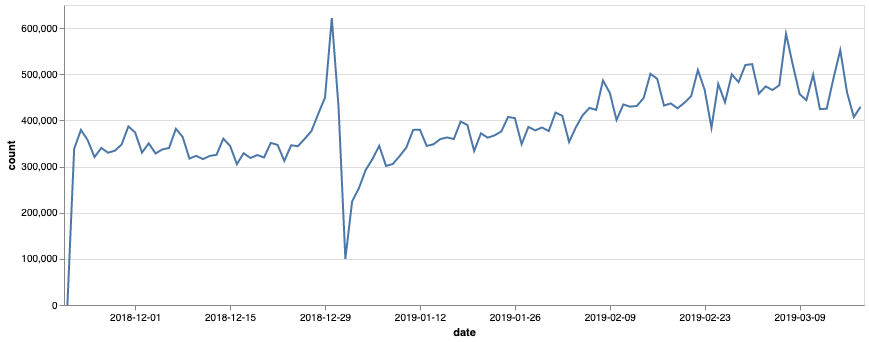

In [115]:
import altair as alt
alt.renderers.enable('notebook')
transactions_by_date['date'] = transactions_by_date['date'].astype(str)

first = pd.to_datetime('2018-12-01')
dates = [str((first + pd.DateOffset(weeks=2*m)).date()) for m in range(10)]

alt.Chart(transactions_by_date).mark_line()\
.encode(
    alt.X('date', axis=alt.Axis(values=dates, labelAngle=0)),
    y='count',
    tooltip='count'
).properties(
    width=800
)